In [1]:
import numpy
print('numpy: {}'.format(numpy.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))

numpy: 1.14.5
pandas: 0.23.1


In [2]:
!pwd

/Users/jakewendt/github/jakewendt/notebooks


vcf header

```
FORMAT=<ID=AD,Number=.,Type=Integer,Description="Allelic depths for the ref and alt alleles in the order listed">
FORMAT=<ID=DP,Number=1,Type=Integer,Description="Read depth">
FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype quality">
FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
FORMAT=<ID=PL,Number=G,Type=Integer,Description="The phred-scaled genotype likelihoods rounded to the closest integer">

INFO=<ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
INFO=<ID=AF,Number=A,Type=Float,Description="Allele frequency, for each ALT allele, in the same order as listed">
INFO=<ID=AN,Number=1,Type=Integer,Description="Total number of alleles in called genotypes">
INFO=<ID=BaseQRankSum,Number=1,Type=Float,Description="Z-score from Wilcoxon rank sum test of Alt Vs. Ref base qualities">
INFO=<ID=ClippingRankSum,Number=1,Type=Float,Description="Z-score From Wilcoxon rank sum test of Alt vs. Ref number of hard clipped bases">
INFO=<ID=DB,Number=0,Type=Flag,Description="dbSNP membership">
INFO=<ID=DP,Number=1,Type=Integer,Description="Combined depth across samples">
INFO=<ID=ExcessHet,Number=1,Type=Float,Description="Phred-scaled p-value for exact test of excess heterozygosity">
INFO=<ID=FS,Number=1,Type=Float,Description="Phred-scaled p-value using Fisher's exact test to detect strand bias">
INFO=<ID=InbreedingCoeff,Number=1,Type=Float,Description="Inbreeding coefficient as estimated from the genotype likelihoods per-sample when compared against the Hardy-Weinberg expectation">
INFO=<ID=MLEAC,Number=A,Type=Integer,Description="Maximum likelihood expectation (MLE) for the allele counts, for each ALT allele, in the same order as listed">
INFO=<ID=MLEAF,Number=A,Type=Float,Description="Maximum likelihood expectation (MLE) for the allele frequency, for each ALT allele, in the same order as listed">
INFO=<ID=MQ,Number=1,Type=Float,Description="RMS mapping quality">
INFO=<ID=MQRankSum,Number=1,Type=Float,Description="Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities">
INFO=<ID=QD,Number=1,Type=Float,Description="Variant Confidence/Quality by Depth">
INFO=<ID=ReadPosRankSum,Number=1,Type=Float,Description="Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias">
INFO=<ID=SOR,Number=1,Type=Float,Description="Symmetric Odds Ratio of 2x2 contingency table to detect strand bias">
```

NEEDS UPDATED

TSV files created like ...

bcftools query -i 'TYPE="snp"' -f '%CHROM\t%POS\t%QUAL\t%AN\t%DB\t%QD\t%MQ\t[%DP]\t[%GQ]\n' FILE >> FILE.snp.tsv

NEEDS UPDATED

In [3]:
file = "data/186069.indel.tsv"

In [4]:
import glob
print(glob.glob(file))

['data/186069.indel.tsv']


In [5]:
#df = pandas.read_csv(file, delimiter="\t")

#df = pandas.read_csv(file, delimiter="\t", dtype={ 'QD': float })

df = pandas.read_csv(file, delimiter="\t", dtype={ 'CHROM': str, 'QD': float }, na_values = ".")


In [6]:
# change QD from "."/NaN to 0.0
df = df.replace({
    'QD': {
        numpy.nan : 0.0,
    },
})

In [7]:
df.head()

,CHROM,POS,REF,ALT,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ,FS,MQRankSum,ReadPosRankSum
0,1,13417,C,CGAGA,511.73,2,1.0,18.95,29.65,27,99,10.098,2.936,1.262
1,1,14934,TGCTGGCCCAGGGCGGGC,T,88.73,2,NaN,2.69,27.28,33,99,8.827,-2.912,0.477
2,1,15903,G,GC,385.73,2,1.0,32.14,37.13,12,36,0.000,NaN,NaN
3,1,17501,CT,C,1172.73,2,NaN,5.83,46.60,201,99,6.197,-0.006,0.906
4,1,28590,T,TTGG,143.00,2,1.0,30.00,24.90,4,12,0.000,NaN,NaN


In [8]:
df['DB'].value_counts()

1.0    857836
Name: DB, dtype: int64

DB=1 means its in dbSNP?

In [9]:
df['AN'].value_counts()

2    1045704
Name: AN, dtype: int64

So the AN field is pointless?

In [10]:
import matplotlib.pyplot as plt

In [11]:
# For some reason, if this is in the same call as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [16.0,6.0]

In [12]:
notdbsnp=df[pandas.isna(df['DB'])]

In [13]:
notdbsnp.shape

(187868, 14)

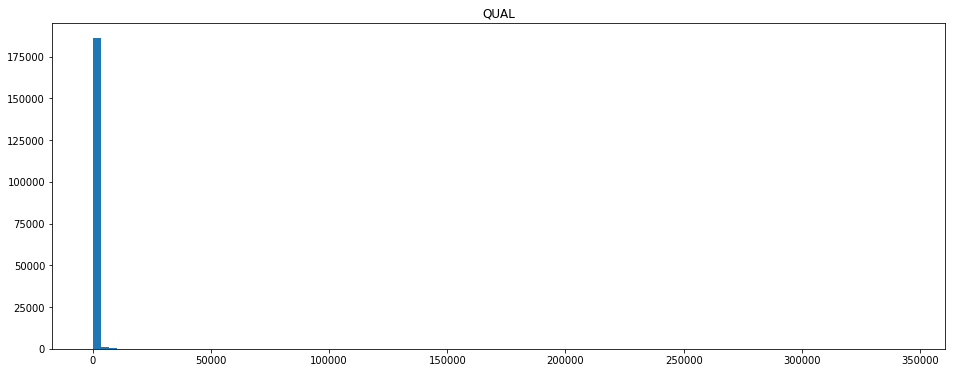

In [14]:
plt.hist(notdbsnp['QUAL'], bins=100)
plt.title('QUAL')
plt.show()

In [15]:
notdbsnp[notdbsnp['QUAL'] > 10000].shape

(266, 14)

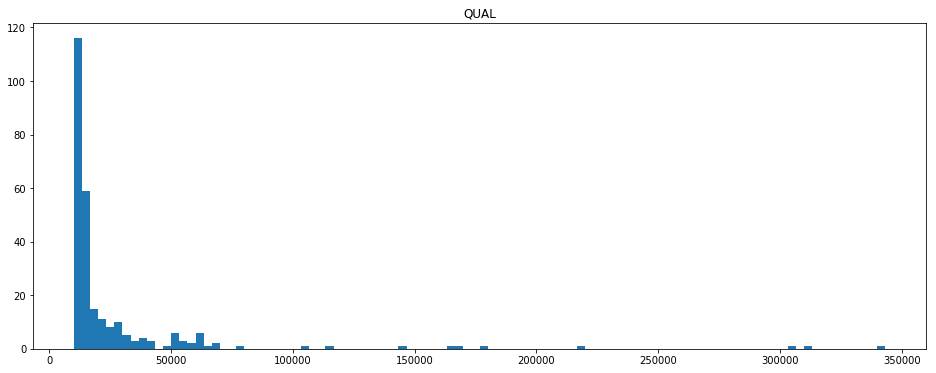

In [16]:
plt.hist(notdbsnp[notdbsnp['QUAL'] > 10000]['QUAL'], bins=100)
plt.title('QUAL')
plt.show()

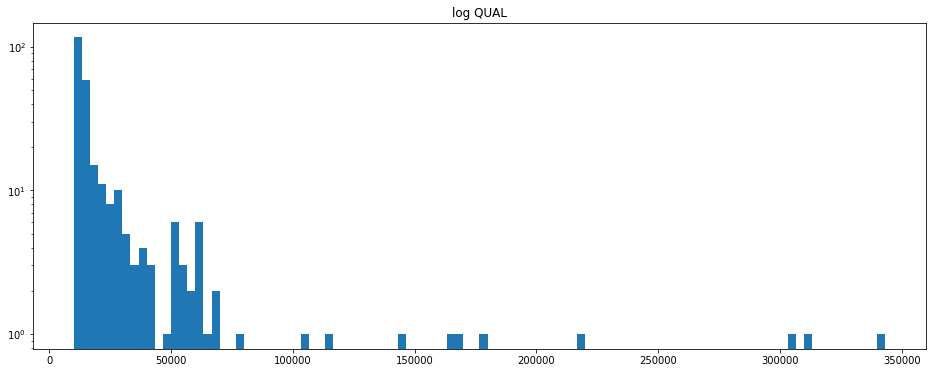

In [17]:
plt.hist(notdbsnp[notdbsnp['QUAL'] > 10000]['QUAL'], bins=100)
plt.title('log QUAL')
plt.yscale('log')
plt.show()

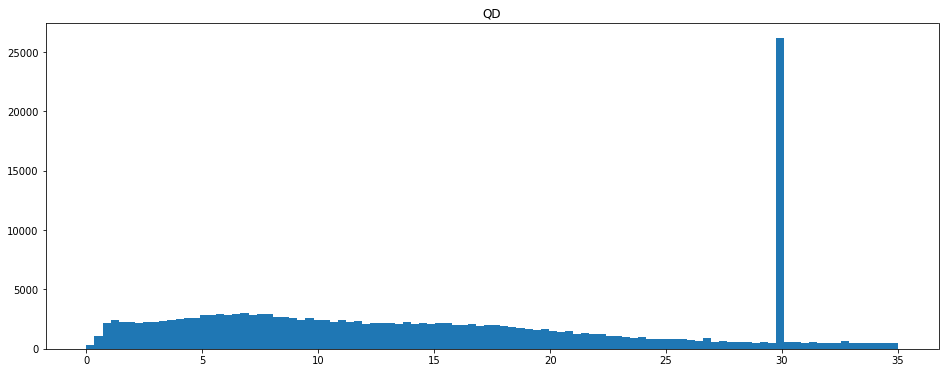

In [18]:
plt.hist(notdbsnp['QD'], bins=100)
plt.title('QD')
plt.show()

In [19]:
notdbsnp[ notdbsnp['QD'] < 2 ]

,CHROM,POS,REF,ALT,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ,FS,MQRankSum,ReadPosRankSum
34,1,267777,C,CA,125.73,2,NaN,1.82,34.31,69,99,15.672,-0.616,1.469
60,1,597685,T,TAA,63.73,2,NaN,1.72,37.34,37,99,14.819,-3.536,0.957
129,1,877959,GGC,G,66.73,2,NaN,0.95,57.17,70,99,8.868,-4.323,-1.093
130,1,877962,A,ATG,93.73,2,NaN,1.34,57.17,70,99,8.868,-4.326,-0.812
131,1,878072,T,TAC,111.73,2,NaN,1.31,57.27,85,99,8.407,-4.892,0.993
132,1,878082,T,TGA,105.73,2,NaN,1.22,57.28,87,99,10.766,-4.899,-0.599
134,1,880404,T,TTCTTTGA,33.73,2,NaN,0.52,58.32,65,71,14.317,-4.023,3.207
136,1,882914,G,GT,67.73,2,NaN,0.98,58.31,69,99,19.319,-4.323,1.749
137,1,882971,TTTTTTTTGA,T,93.73,2,NaN,1.28,58.12,73,99,27.567,-4.578,1.456
142,1,890445,T,TAA,38.73,2,NaN,0.61,58.04,64,76,9.610,-2.796,-0.280


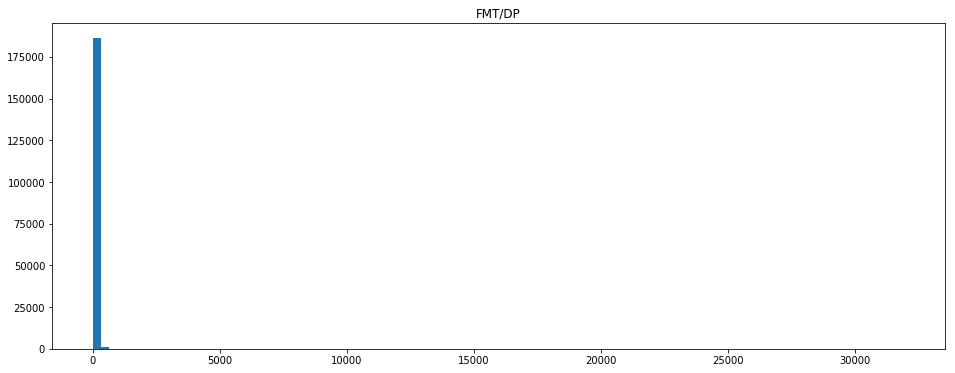

In [20]:
plt.hist(notdbsnp['FMT/DP'], bins=100)
plt.title('FMT/DP')
plt.show()

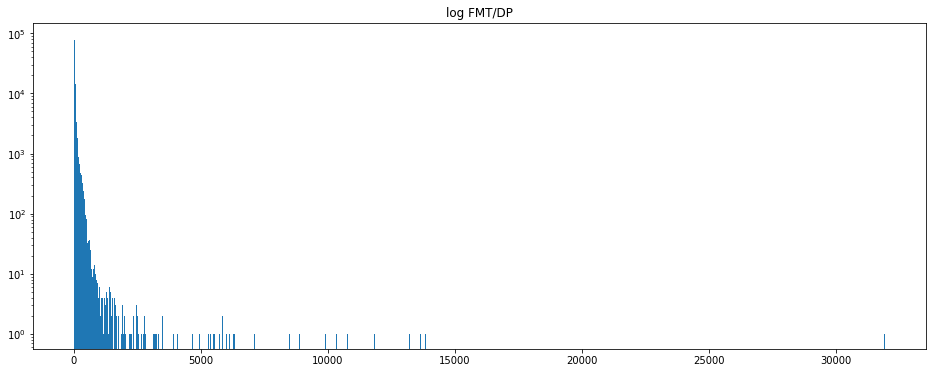

In [21]:
plt.hist(notdbsnp['FMT/DP'], bins=1000)
plt.title('log FMT/DP')
plt.yscale('log')
plt.show()

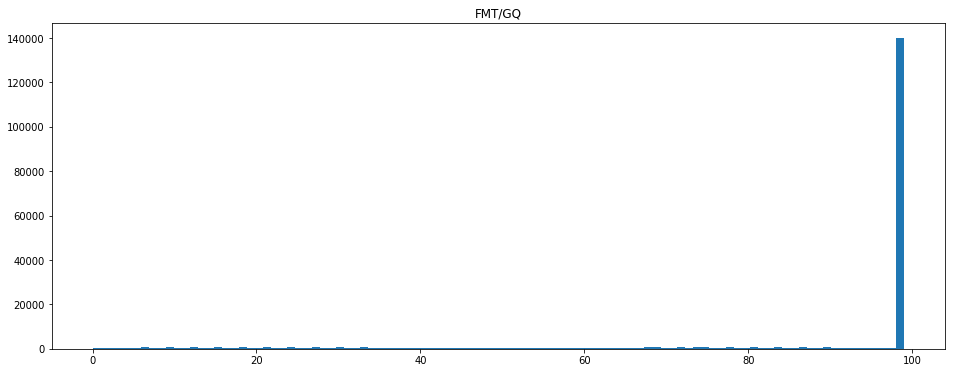

In [22]:
plt.hist(notdbsnp['FMT/GQ'], bins=100)
plt.title('FMT/GQ')
plt.show()

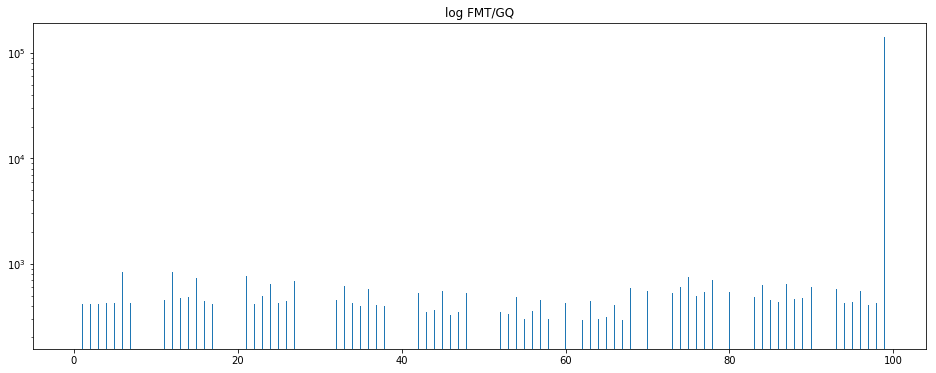

In [23]:
plt.hist(notdbsnp['FMT/GQ'], bins=1000)
plt.title('log FMT/GQ')
plt.yscale('log')
plt.show()

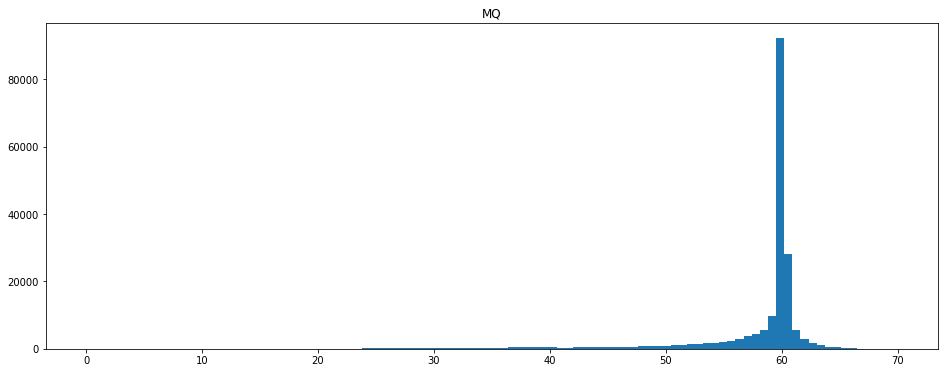

In [24]:
plt.hist(notdbsnp['MQ'], bins=100)
plt.title('MQ')
plt.show()

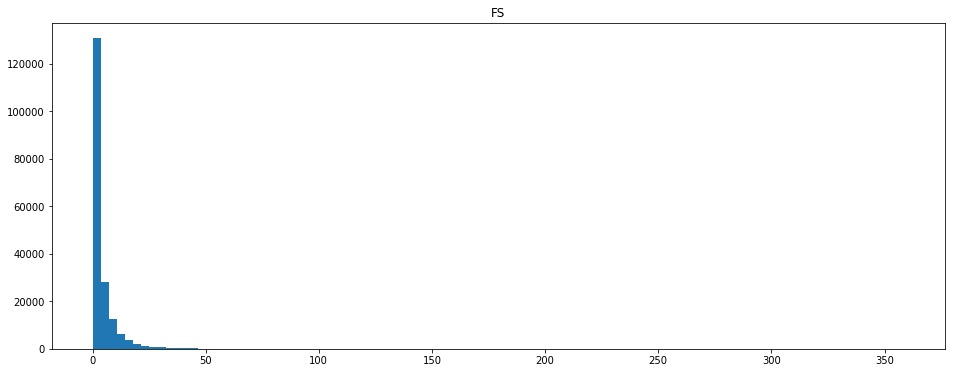

In [25]:
plt.hist(notdbsnp['FS'], bins=100)
plt.title('FS')
plt.show()

In [26]:
notdbsnp[ notdbsnp['FS'] > 200 ]

,CHROM,POS,REF,ALT,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ,FS,MQRankSum,ReadPosRankSum
43385,1,125181946,GATGATTCCATTCAATC,G,7256.73,2,NaN,7.20,37.49,1008,99,214.623,-13.757,17.996
975629,21,8222641,C,CGTGTGT,52.73,2,NaN,0.13,28.53,395,90,358.691,-6.147,-8.448
995335,22,12598915,TG,T,4472.73,2,NaN,20.15,47.54,222,99,200.313,-12.773,1.373


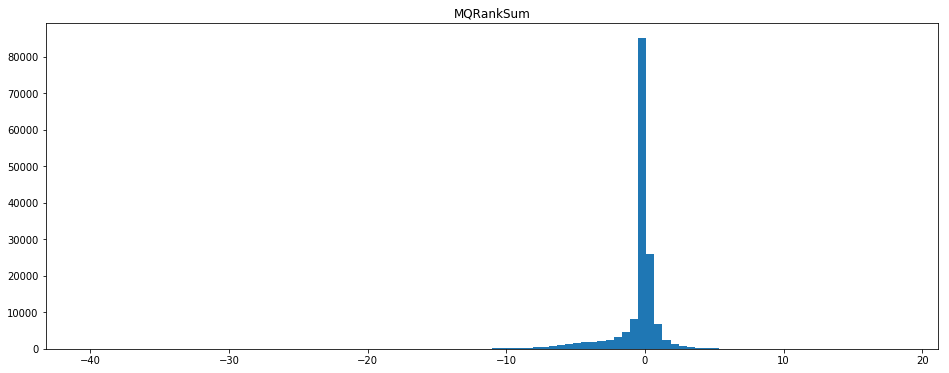

In [27]:
plt.hist( notdbsnp[ pandas.notna(notdbsnp['MQRankSum']) ]['MQRankSum'], bins=100)
plt.title('MQRankSum')
plt.show()

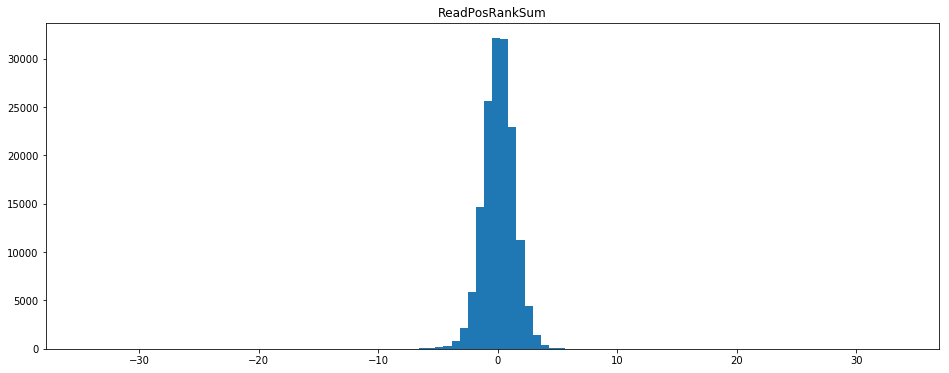

In [28]:
plt.hist(notdbsnp[ pandas.notna(notdbsnp['ReadPosRankSum']) ]['ReadPosRankSum'], bins=100)
plt.title('ReadPosRankSum')
plt.show()

In [29]:
notdbsnp[ notdbsnp['ReadPosRankSum'] <  -20.0 ]

,CHROM,POS,REF,ALT,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ,FS,MQRankSum,ReadPosRankSum
249229,4,49711806,C,CA,34261.70,2,NaN,6.12,33.67,5599,99,46.892,-8.522,-26.501
841744,16,34593384,CATTCGATTCCATTCGATGACTCCATTCTGTTCCATTCGATGATGA...,C,7874.73,2,NaN,0.93,47.80,8482,99,7.010,-40.308,-34.435


In [30]:
notdbsnp[ ( notdbsnp['QUAL'] > 5000 ) & ( notdbsnp['QD'] > 10 ) & ( notdbsnp['FMT/DP'] > 20 ) & ( notdbsnp['FMT/GQ'] > 90 ) & ( notdbsnp['MQ'] > 50 ) ]

,CHROM,POS,REF,ALT,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ,FS,MQRankSum,ReadPosRankSum
43264,1,125085160,T,TC,5215.73,2,NaN,18.97,58.04,275,99,11.709,-0.176,1.748
43265,1,125085162,A,ATG,5212.73,2,NaN,18.96,58.05,275,99,11.733,-0.165,1.432
43369,1,125164643,CGATTCCATTG,C,5469.73,2,NaN,23.99,59.86,228,99,23.690,3.950,-0.425
43388,1,125184263,A,AT,22389.70,2,NaN,30.00,55.49,509,99,0.000,NaN,NaN
43689,1,144104486,T,TGGTTGGCTGGCTTGGCTGTCTTGGCTGGCTGGCTTGGCA,6640.73,2,NaN,14.76,53.79,450,99,0.465,-1.115,-1.334
111112,2,89775308,T,TGATGATTCCATTC,7748.73,2,NaN,30.00,59.62,153,99,0.000,NaN,NaN
111116,2,89799301,T,TTGA,5477.73,2,NaN,30.00,60.08,123,99,0.000,NaN,NaN
111161,2,89838408,TGAATG,T,7142.73,2,NaN,26.85,58.89,266,99,1.672,-0.606,0.187
111478,2,91446421,GA,G,5618.73,2,NaN,30.05,54.87,187,99,0.000,NaN,NaN
132265,2,161278950,T,"TCCCTTCCTCCC,TCCCTTCCTTCCTCCCTTCCTCCC",24723.70,2,NaN,30.00,52.82,395,99,16.262,-10.098,3.512


In [31]:
notdbsnp[ ( notdbsnp['QD'] < 2 ) & ( notdbsnp['FS'] > 200 ) & ( notdbsnp['ReadPosRankSum']  <  -20.0 )]

,CHROM,POS,REF,ALT,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ,FS,MQRankSum,ReadPosRankSum
